In [61]:
import pandas as pd
import numpy as np
import cv2
from matplotlib import pyplot as plt

from glob import glob
from pathlib import Path
import torch

In [62]:
def load_mask():
    print('loading mask...')
    rle_masks = pd.read_csv('../WC_input/model_50A_slim_ensemble.csv')
    rle_masks = rle_masks[rle_masks['rle_mask'].isnull() == False]
    rle_masks.index = rle_masks['id']
    del rle_masks['id']
    rle_masks = rle_masks.to_dict('index')
    return rle_masks

In [63]:
rle_masks = load_mask()

loading mask...


In [139]:
rle_masks['PM-WWA-20060610-130']

{'rle_mask': '18902 3 19093 6 19284 8 19476 9 19668 9 19860 10 20051 12 20243 12 20435 12 20627 13 20819 13 21011 14 21202 15 21394 16 21586 16 21778 17 21970 17 22161 19 22353 20 22545 20 22737 21 22929 21 23121 22 23312 23 23504 24 23696 25 23888 25 24080 26 24271 28 24463 29 24655 29 24847 29 25039 29 25231 30 25423 30 25615 30 25807 30 25999 30 26191 30 26383 30 26575 30 26767 30 26959 30 27151 30 27343 30 27535 30 27727 29 27919 29 28110 31 28302 31 28494 31 28686 31 28878 31 29070 31 29262 31 29454 31 29646 31 29838 31 30030 31 30222 31 30413 32 30605 32 30797 32 30990 31 31182 30 31374 30 31566 30 31758 30 31950 30 32142 30 32334 30 32526 30 32718 30 32910 30 33102 30 33294 30 33486 30 33679 29 33871 29 34063 29 34255 29 34448 28 34640 28 34832 28 35025 27 35217 27 35409 27 35601 27 35794 26 35986 27 36178 27 36371 25 36563 25 36755 25 36947 25 37140 24 37332 24 37524 24 37716 24 37908 24 38100 23 38291 24 38483 24 38674 25 38865 25 39057 25 39249 25 39440 25 39632 25 39823 26 4

In [140]:
def do_length_decode(rle, H=192, W=384, fill_value=255):
    mask = np.zeros((H,W), np.uint8)
    if type(rle).__name__ == 'float': return mask
    mask = mask.reshape(-1)
    rle = np.array([int(s) for s in rle.split(' ')]).reshape(-1, 2)
    for r in rle:
        start = r[0]-1
        end = start + r[1]
        mask[start : end] = fill_value
    mask = mask.reshape(W, H).T   # H, W need to swap as transposing.
    return mask

In [141]:
name = 'PM-WWA-20060610-130'
label = '-1'
mask = do_length_decode(rle_masks[name.split('.')[0]]['rle_mask'])

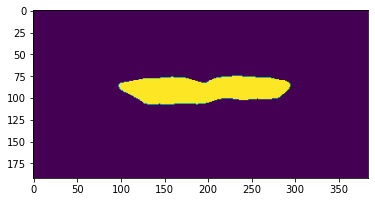

In [142]:
plt.imshow(mask)
plt.show()

In [143]:
mask.shape

(192, 384)

(244, 384, 3)

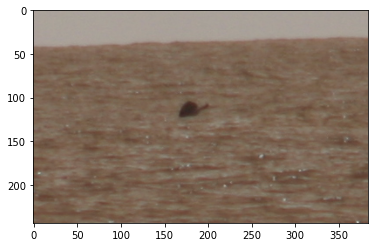

In [144]:
image = cv2.imread(f'../../updated_data/train/{label}/{name}.jpg') 
plt.imshow(image);image.shape

In [145]:
mask = cv2.resize(mask, image.shape[:2][::-1])

In [146]:
mask.shape

(244, 384)

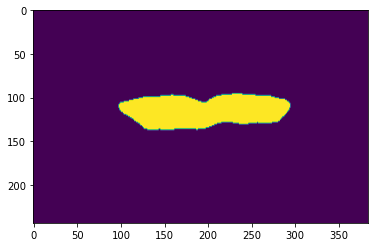

In [147]:
plt.imshow(mask)
plt.show()

In [148]:
def load_bbox():
    # Image,x0,y0,x1,y1
    print('loading bbox...')
    bbox = pd.read_csv('../WC_input/bboxs.csv')
    Images = bbox['Image'].tolist()
    x0s = bbox['x0'].tolist()
    y0s = bbox['y0'].tolist()
    x1s = bbox['x1'].tolist()
    y1s = bbox['y1'].tolist()
    bbox_dict = {}
    for Image,x0,y0,x1,y1 in zip(Images,x0s,y0s,x1s,y1s):
        bbox_dict[Image] = [x0, y0, x1, y1]
    return bbox_dict

In [149]:
bbox_dict = load_bbox()

loading bbox...


In [150]:
x0, y0, x1, y1 = bbox_dict[f'{name}.jpg']

In [151]:
[e if e > 0 else 0 for e in bbox_dict[f'{name}.jpg'] ]

[147, 117, 207, 122]

In [152]:
x0, y0, x1, y1

(147, 117, 207, 122)

In [153]:
image = image[int(0):int(y1), int(x0):int(x1)]
image.shape

(122, 60, 3)

In [133]:
mask = mask[int(0):int(y1), int(x0):int(x1)]
mask.shape

(122, 60)

(122, 60, 3)

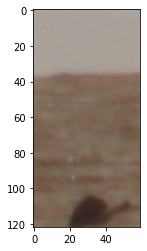

In [134]:
plt.imshow(image); image.shape

(122, 60)

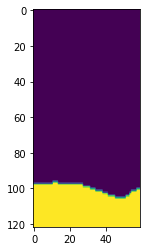

In [135]:
plt.imshow(mask); mask.shape

In [136]:
img1, img2 = transform_valid(image, mask)

transform_valid (122, 60, 3) (122, 60)


In [137]:
img1.shape

torch.Size([4, 256, 512])

In [138]:
img2.shape

torch.Size([4, 256, 512])